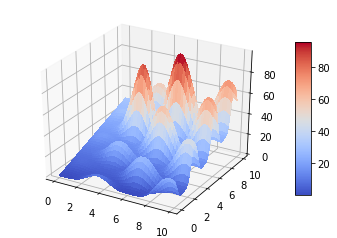

In [81]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 10, 0.1)
Y = np.arange(0, 10, 0.1)
X, Y = np.meshgrid(X, Y)

F1 = lambda x,y:((6.452*(x+0.125*x)*(np.cos(x)-np.cos(2.*y))**2)/np.sqrt(0.8+(x-4.2)**2+2*(y-7)**2))+(3.226*y);

# Plot the surface.
surf = ax.plot_surface(X, Y, F1(X,Y), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.7, aspect=10)

plt.show()

# Algoritmo Genetico

In [146]:
mini=0;           #Valor minimo que toman las variables de la funcion
maxi=9.99;        #Valor maximo que toman las variables de la funcion
Tm=0.05;           #Tasa de mutacion 
Tc=0.05;          #Tasa de cruce  Porcentaje de parejas van a ser seleccionadas para el cruce
population=1000; #Tamaño de la poblacion
var=2;            #Numero de variables para la funcion
N=10;           #Numero de generaciones
alpha= 0.8        #For aritmetic recombination

In [150]:
Pop = np.random.rand(population,var)*10 #Random numbers in [0,10]

for gen in range(N):
    # Fitness evaluation
    Fitness = F1(Pop[:,0],Pop[:,1])
    
    BestIndividuos = np.argsort(-Fitness)
    
    Pop = Pop[BestIndividuos]
    
    Wheel = np.cumsum(Fitness[BestIndividuos])/np.sum(Fitness[BestIndividuos])
    
    # Crossover - Wheel 
    
    for parent in range(int(Tc*population/2)):
        P = np.random.rand(1)
        ParentSelected_1 = np.where(Wheel >= P)[0][0]
        
        P = np.random.rand(1)
        ParentSelected_2 = np.where(Wheel >= P)[0][0]
        
        #Crossover Aritmetic recombination
        Child_1 = (1-alpha)*Pop[ParentSelected_1] + alpha*Pop[ParentSelected_2]
        Child_2 = alpha*Pop[ParentSelected_1]     + (1-alpha)*Pop[ParentSelected_2]
    
        #Add to population
        Pop = np.append(Pop,Child_1[None,:],axis=0)
        Pop = np.append(Pop,Child_2[None,:],axis=0)
    
    
    # Mutation - Wheel
    for parent in range(int(Tm*population)):
        P = np.random.rand(1)
        ParentSelected = np.where(Wheel >= P)[0][0]
        
        #Add to population
        Child_1 = Pop[ParentSelected] + np.random.rand(1)
        Pop = np.append(Pop,Child_1[None,:],axis=0)
        
    #Selection
    Fitness = F1(Pop[:,0],Pop[:,1])
    
    BestIndividuos = np.argsort(-Fitness)
    
    Pop = Pop[BestIndividuos[:population]]

In [151]:
F1(Pop[:,0],Pop[:,1])

array([ 97.6758813 ,  97.63672309,  97.60998538,  97.34356803,
        96.87880157,  96.83433354,  96.78544292,  96.47151127,
        96.23242841,  95.87815349,  95.61774628,  94.88832037,
        94.87195925,  94.83931284,  94.52836237,  94.48028214,
        94.4499385 ,  94.36536233,  94.34766413,  93.92829955,
        93.30377805,  93.25039843,  92.76945184,  92.04366563,
        91.87001584,  91.76219025,  91.68382871,  91.59689993,
        91.3194611 ,  91.25598424,  91.15999237,  91.09610861,
        90.83034737,  90.58467794,  89.94072275,  89.82421625,
        88.09843476,  88.03394089,  87.75954877,  87.72223904,
        87.55198557,  87.55180812,  86.94140301,  86.73152219,
        86.24631243,  85.94782209,  85.54831769,  85.3761157 ,
        85.21828578,  85.13239258,  85.13033949,  85.04395765,
        84.92651981,  84.9210161 ,  84.8380937 ,  84.65985063,
        84.62391125,  84.5039217 ,  84.32599277,  84.1571649 ,
        84.13295789,  84.10333811,  84.05251082,  84.01

In [152]:
Pop

array([[ 6.16032194,  7.79461747],
       [ 6.07606194,  7.81555122],
       [ 6.15448858,  7.82140298],
       ..., 
       [ 6.5171582 ,  5.54987279],
       [ 7.33116423,  8.95303205],
       [ 0.53797803,  8.18373777]])